In [1]:
import seaborn as sb # From this package we will load the data.
import pandas as pd # We need this package to use dataframes. They are quite handy!
import numpy as np # I am sure we need it somewhere.. 

# First, lets load the datat set titanic and lets have a short look inside.
titanic = sb.load_dataset('titanic')
print(titanic[0:20])

    survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0          0       3    male  22.0      1      0   7.2500        S   Third   
1          1       1  female  38.0      1      0  71.2833        C   First   
2          1       3  female  26.0      0      0   7.9250        S   Third   
3          1       1  female  35.0      1      0  53.1000        S   First   
4          0       3    male  35.0      0      0   8.0500        S   Third   
5          0       3    male   NaN      0      0   8.4583        Q   Third   
6          0       1    male  54.0      0      0  51.8625        S   First   
7          0       3    male   2.0      3      1  21.0750        S   Third   
8          1       3  female  27.0      0      2  11.1333        S   Third   
9          1       2  female  14.0      1      0  30.0708        C  Second   
10         1       3  female   4.0      1      1  16.7000        S   Third   
11         1       1  female  58.0      0      0  26.5500       

In [2]:
# Alright. Lets see if every row has a value or if there are voids
print(titanic.count())

survived       891
pclass         891
sex            891
age            714
sibsp          891
parch          891
fare           891
embarked       889
class          891
who            891
adult_male     891
deck           203
embark_town    889
alive          891
alone          891
dtype: int64


In [3]:
# So what are the mean values?
print(titanic.mean())

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64


In [4]:
# And what if we sum them?
print(titanic.sum())

survived                                                    342
pclass                                                     2057
sex           malefemalefemalefemalemalemalemalemalefemalefe...
age                                                     21205.2
sibsp                                                       466
parch                                                       340
fare                                                    28693.9
class         ThirdFirstThirdFirstThirdThirdFirstThirdThirdS...
who           manwomanwomanwomanmanmanmanchildwomanchildchil...
adult_male                                                  537
alive         noyesyesyesnonononoyesyesyesyesnononoyesnoyesn...
alone                                                       537
dtype: object


In [5]:
# Lets see the differences between men and women
print('--------------------------------------------------------------------------------- gender means')
print(titanic.groupby('sex').mean())
print('--------------------------------------------------------------------------------- gender counts')
print(titanic.groupby('sex').count())
print('--------------------------------------------------------------------------------- gender sums')
print(titanic.groupby('sex').sum())


--------------------------------------------------------------------------------- gender means
        survived    pclass        age     sibsp     parch       fare  \
sex                                                                    
female  0.742038  2.159236  27.915709  0.694268  0.649682  44.479818   
male    0.188908  2.389948  30.726645  0.429809  0.235702  25.523893   

        adult_male     alone  
sex                           
female    0.000000  0.401274  
male      0.930676  0.712305  
--------------------------------------------------------------------------------- gender counts
        survived  pclass  age  sibsp  parch  fare  embarked  class  who  \
sex                                                                       
female       314     314  261    314    314   314       312    314  314   
male         577     577  453    577    577   577       577    577  577   

        adult_male  deck  embark_town  alive  alone  
sex                                      

In [6]:
# And between the classes
print('--------------------------------------------------------------------------------- pclass means')
print(titanic.groupby('pclass').mean())
print('--------------------------------------------------------------------------------- pclass counts')
print(titanic.groupby('pclass').count())
print('--------------------------------------------------------------------------------- pclass sums')
print(titanic.groupby('pclass').sum())

--------------------------------------------------------------------------------- pclass means
        survived        age     sibsp     parch       fare  adult_male  \
pclass                                                                   
1       0.629630  38.233441  0.416667  0.356481  84.154687    0.550926   
2       0.472826  29.877630  0.402174  0.380435  20.662183    0.538043   
3       0.242363  25.140620  0.615071  0.393075  13.675550    0.649695   

           alone  
pclass            
1       0.504630  
2       0.565217  
3       0.659878  
--------------------------------------------------------------------------------- pclass counts
        survived  sex  age  sibsp  parch  fare  embarked  class  who  \
pclass                                                                 
1            216  216  186    216    216   216       214    216  216   
2            184  184  173    184    184   184       184    184  184   
3            491  491  355    491    491   491       49

In [7]:
# What gender survived in which class?
print(titanic.pivot_table('survived','sex','class'))

class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


In [8]:
# Make categories from the age
age_range = pd.cut(titanic['age'],[0,17,100])
print(age_range)
print('----------------')
print(titanic.pivot_table('survived',['sex',age_range],'class'))

0      (17.0, 100.0]
1      (17.0, 100.0]
2      (17.0, 100.0]
3      (17.0, 100.0]
4      (17.0, 100.0]
           ...      
886    (17.0, 100.0]
887    (17.0, 100.0]
888              NaN
889    (17.0, 100.0]
890    (17.0, 100.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64]): [(0, 17] < (17, 100]]
----------------
class                First    Second     Third
sex    age                                    
female (0, 17]    0.875000  1.000000  0.542857
       (17, 100]  0.974026  0.903226  0.417910
male   (0, 17]    1.000000  0.818182  0.232558
       (17, 100]  0.371134  0.068182  0.133333


In [9]:
# Lets do a first Decision Tree
from sklearn.tree import DecisionTreeClassifier
import sklearn
from sklearn import tree
from sklearn import preprocessing

print(sklearn.__version__)

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# All paramaters taken here are defaults
dtree = tree.DecisionTreeClassifier(
    criterion='gini', # {“gini”, “entropy”}
    splitter='best', # {“best”, “random”} 
    max_depth=None, # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    min_samples_split=2, # The minimum number of samples required to split an internal node 
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node. 
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
    max_features=None, # The number of features to consider when looking for the best split
    max_leaf_nodes=None, #Grow a tree with max_leaf_nodes in best-first fashion. 
    min_impurity_decrease=0.0 # A node will be split if this split induces a decrease of the impurity greater than or equal to this value. 
    )

# transform female into 0 and male into 1 using an extra column
sex_encoder = preprocessing.LabelEncoder()
sex_encoder.fit(['female','male', np.nan])
titanic['encoded_sex']=sex_encoder.transform(titanic['sex'])

# same for class
class_encoder = preprocessing.LabelEncoder()
class_encoder.fit(['First','Second','Third', np.nan])
titanic['encoded_class']=class_encoder.transform(titanic['class'])

# kick the nans out
titanic['encoded_age']=titanic['age'].replace(np.nan,-1)

print(titanic[:10])

dtree = dtree.fit(titanic[['encoded_sex','encoded_age','encoded_class']],titanic[['survived']])


0.21.3
   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  encoded_sex  \
0    man        True  NaN  Southampton    no  False            1   
1  woman 

[1]


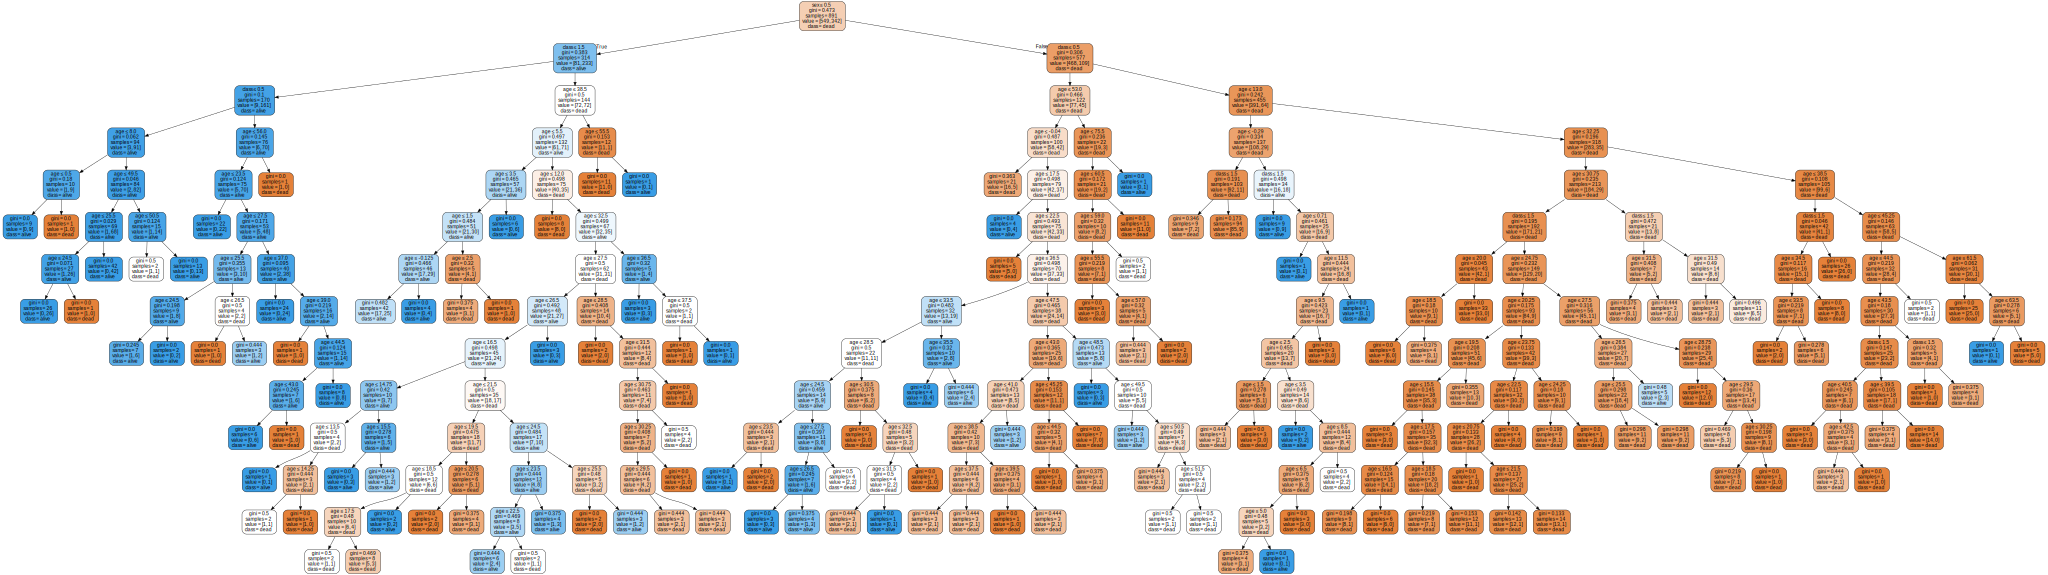

In [10]:
# now we can classify samples
# sex, age, class predicting survived
print(dtree.predict([[0,10,0]]))

# and print the tree to check was has happened
import graphviz 
dot_data = tree.export_graphviz(dtree, 
                                out_file=None,
                                feature_names=['sex','age','class'],  
                                class_names=['dead','alive'],  
                                filled=True, rounded=True,  
                                special_characters=True)   

display(graphviz.Source(dot_data))

In [11]:
# Now we want to find out, how good the prediction is.
prediction_array=dtree.predict(titanic[['encoded_sex','encoded_age','encoded_class']])
prediction_dataframe=pd.DataFrame(data=prediction_array, columns=["prediction"])
prediction_dataframe['result']=titanic['survived']

print(prediction_dataframe)
print("predicted and actual deaths in total: ")
print(prediction_dataframe.apply(np.sum, axis=0))

false_deaths=0
false_alives=0
false_predictions=0
correct_predictions=0
      
for ind in prediction_dataframe.index:
      if (prediction_dataframe['result'][ind]==prediction_dataframe['prediction'][ind]):
          correct_predictions+=1
      else:
          false_predictions+=1
      if(prediction_dataframe['result'][ind]!=prediction_dataframe['prediction'][ind] and prediction_dataframe['prediction'][ind]==0):
          false_deaths+=1
      if(prediction_dataframe['result'][ind]!=prediction_dataframe['prediction'][ind] and prediction_dataframe['prediction'][ind]==1):
          false_alives+=1
    
print("Correct predictions: "+str(correct_predictions)+" total, "+str(correct_predictions*100/890)+"%")
print("False predictions: "+str(false_predictions)+" total, "+str(false_predictions*100/890)+"%")
print("Erronously predicted people alive "+str(false_alives))
print("Erronously predicted people dead "+str(false_deaths))

     prediction  result
0             0       0
1             1       1
2             1       1
3             1       1
4             0       0
..          ...     ...
886           0       0
887           1       1
888           1       0
889           1       1
890           0       0

[891 rows x 2 columns]
predicted and actual deaths in total: 
prediction    297
result        342
dtype: int64
Correct predictions: 784 total, 88.08988764044943%
False predictions: 107 total, 12.02247191011236%
Erronously predicted people alive 31
Erronously predicted people dead 76


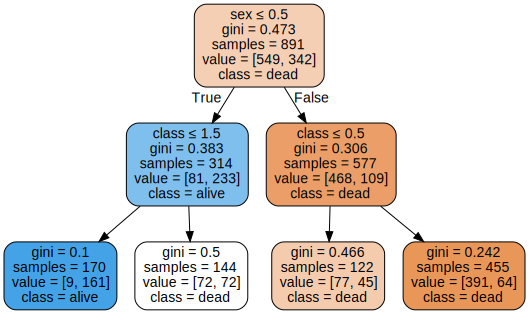

In [12]:
# OK, since the age is making the graph explode, we can use ranges

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# All paramaters taken here are defaults
dtree2 = tree.DecisionTreeClassifier(
    criterion='gini', # {“gini”, “entropy”}
    splitter='best', # {“best”, “random”} 
    max_depth=None, # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    min_samples_split=2, # The minimum number of samples required to split an internal node 
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node. 
    min_weight_fraction_leaf=0.005, # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
    max_features=None, # The number of features to consider when looking for the best split
    max_leaf_nodes=None, #Grow a tree with max_leaf_nodes in best-first fashion. 
    min_impurity_decrease=0.01 # A node will be split if this split induces a decrease of the impurity greater than or equal to this value. 
    )

titanic['ranged_age']=pd.cut(titanic['age'],[-2,0,17,100])
titanic['ranged_age']=titanic['ranged_age'].astype('str')
age_encoder = preprocessing.LabelEncoder()
age_encoder.fit(titanic['ranged_age'])
titanic['encoded_age']=age_encoder.transform(titanic['ranged_age'])
titanic['encoded_age']=titanic['encoded_age'].replace(np.nan,-1)

dtree2 = dtree2.fit(titanic[['encoded_sex','encoded_age','encoded_class']],titanic[['survived']])

dot_data = tree.export_graphviz(dtree2, 
                                out_file=None,
                                feature_names=['sex','age','class'],  
                                class_names=['dead','alive'],  
                                filled=True, rounded=True,  
                                special_characters=True)   

display(graphviz.Source(dot_data))

In [13]:
# Now we want to find out, how good the prediction is.
prediction_array=dtree2.predict(titanic[['encoded_sex','encoded_age','encoded_class']])
prediction_dataframe=pd.DataFrame(data=prediction_array, columns=["prediction"])
prediction_dataframe['result']=titanic['survived']

print(prediction_dataframe)
print("predicted and actual deaths in total: ")
print(prediction_dataframe.apply(np.sum, axis=0))

false_deaths=0
false_alives=0
false_predictions=0
correct_predictions=0
      
for ind in prediction_dataframe.index:
      if (prediction_dataframe['result'][ind]==prediction_dataframe['prediction'][ind]):
          correct_predictions+=1
      else:
          false_predictions+=1
      if(prediction_dataframe['result'][ind]!=prediction_dataframe['prediction'][ind] and prediction_dataframe['prediction'][ind]==0):
          false_deaths+=1
      if(prediction_dataframe['result'][ind]!=prediction_dataframe['prediction'][ind] and prediction_dataframe['prediction'][ind]==1):
          false_alives+=1
    
print("Correct predictions: "+str(correct_predictions)+" total, "+str(correct_predictions*100/890)+"%")
print("False predictions: "+str(false_predictions)+" total, "+str(false_predictions*100/890)+"%")
print("Erronously predicted people alive "+str(false_alives))
print("Erronously predicted people dead "+str(false_deaths))

     prediction  result
0             0       0
1             1       1
2             0       1
3             1       1
4             0       0
..          ...     ...
886           0       0
887           1       1
888           0       0
889           0       1
890           0       0

[891 rows x 2 columns]
predicted and actual deaths in total: 
prediction    170
result        342
dtype: int64
Correct predictions: 701 total, 78.76404494382022%
False predictions: 190 total, 21.348314606741575%
Erronously predicted people alive 9
Erronously predicted people dead 181


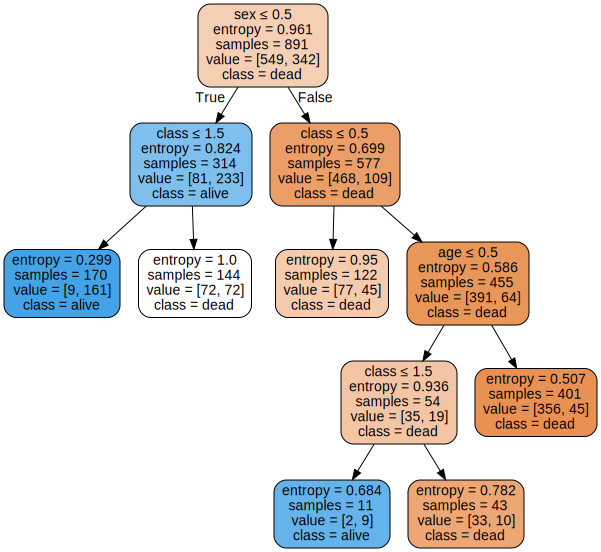

In [14]:
# Also lets try the same stuff from before with entropy

# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# All paramaters taken here are defaults
dtree2 = tree.DecisionTreeClassifier(
    criterion='entropy', # {“gini”, “entropy”}
    splitter='best', # {“best”, “random”} 
    max_depth=None, # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
    min_samples_split=2, # The minimum number of samples required to split an internal node 
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node. 
    min_weight_fraction_leaf=0.005, # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
    max_features=None, # The number of features to consider when looking for the best split
    max_leaf_nodes=None, #Grow a tree with max_leaf_nodes in best-first fashion. 
    min_impurity_decrease=0.01 # A node will be split if this split induces a decrease of the impurity greater than or equal to this value. 
    )

titanic['ranged_age']=pd.cut(titanic['age'],[-2,0,17,100])
titanic['ranged_age']=titanic['ranged_age'].astype('str')
age_encoder = preprocessing.LabelEncoder()
age_encoder.fit(titanic['ranged_age'])
titanic['encoded_age']=age_encoder.transform(titanic['ranged_age'])
titanic['encoded_age']=titanic['encoded_age'].replace(np.nan,-1)

dtree2 = dtree2.fit(titanic[['encoded_sex','encoded_age','encoded_class']],titanic[['survived']])

dot_data = tree.export_graphviz(dtree2, 
                                out_file=None,
                                feature_names=['sex','age','class'],  
                                class_names=['dead','alive'],  
                                filled=True, rounded=True,  
                                special_characters=True)   

display(graphviz.Source(dot_data))

In [15]:
# Now we want to find out, how good the prediction is.
prediction_array=dtree2.predict(titanic[['encoded_sex','encoded_age','encoded_class']])
prediction_dataframe=pd.DataFrame(data=prediction_array, columns=["prediction"])
prediction_dataframe['result']=titanic['survived']

print(prediction_dataframe)
print("predicted and actual deaths in total: ")
print(prediction_dataframe.apply(np.sum, axis=0))

false_deaths=0
false_alives=0
false_predictions=0
correct_predictions=0
      
for ind in prediction_dataframe.index:
      if (prediction_dataframe['result'][ind]==prediction_dataframe['prediction'][ind]):
          correct_predictions+=1
      else:
          false_predictions+=1
      if(prediction_dataframe['result'][ind]!=prediction_dataframe['prediction'][ind] and prediction_dataframe['prediction'][ind]==0):
          false_deaths+=1
      if(prediction_dataframe['result'][ind]!=prediction_dataframe['prediction'][ind] and prediction_dataframe['prediction'][ind]==1):
          false_alives+=1
    
print("Correct predictions: "+str(correct_predictions)+" total, "+str(correct_predictions*100/890)+"%")
print("False predictions: "+str(false_predictions)+" total, "+str(false_predictions*100/890)+"%")
print("Erronously predicted people alive "+str(false_alives))
print("Erronously predicted people dead "+str(false_deaths))

     prediction  result
0             0       0
1             1       1
2             0       1
3             1       1
4             0       0
..          ...     ...
886           0       0
887           1       1
888           0       0
889           0       1
890           0       0

[891 rows x 2 columns]
predicted and actual deaths in total: 
prediction    181
result        342
dtype: int64
Correct predictions: 708 total, 79.5505617977528%
False predictions: 183 total, 20.56179775280899%
Erronously predicted people alive 11
Erronously predicted people dead 172
